In [1]:
from google.colab import files
uploaded = files.upload()

Saving LCDataDictionary.csv to LCDataDictionary.csv
Saving loans_2007.csv to loans_2007.csv
Saving LoanStats3a.csv to LoanStats3a.csv


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
plt.style.use('fivethirtyeight')

# Load the accepted loan dataset
# low_memory and skiprows in read_csv because the file is large and it leads to the Lending Club website
try:
    loan_data = pd.read_csv("LoanStats3a.csv", low_memory = False, skiprows = 1)
    print("The loan dataset has {} samples with {} features.".format(*loan_data.shape))
except:
    print("The loan dataset could not be loaded. Is the dataset missing?")

The loan dataset has 42538 samples with 111 features.


In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.iloc[0]

,0
id,1077501
member_id,1296599.0
loan_amnt,5000.0
funded_amnt,5000.0
funded_amnt_inv,4975.0
...,...
tax_liens,0.0
tot_hi_cred_lim,NaN
total_bal_ex_mort,NaN
total_bc_limit,NaN


In [5]:
loan_data = loan_data.drop(['desc', 'url'],axis=1)

In [6]:
loan_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [7]:
# count half point of the dataset.
half_point = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_point, axis=1)
# we save the new file
loan_data.to_csv('loan_data.csv', index=False)

In [8]:
loan_data = pd.read_csv('loan_data.csv', low_memory = False)
loan_data.drop_duplicates()

loan_data.iloc[0]

,0
id,1077501
member_id,1296599.0
loan_amnt,5000.0
funded_amnt,5000.0
funded_amnt_inv,4975.0
term,36 months
int_rate,10.65%
installment,162.87
grade,B
sub_grade,B2


In [9]:
loan_data.shape[1]

52

In [10]:
first_entry = loan_data.iloc[0]
first_entry.to_csv('first_entry.csv', index = True)

In [11]:
import chardet

# Open the file in binary mode
with open('LCDataDictionary.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    print(result)  # Example output: {'encoding': 'ISO-8859-1', 'confidence': 0.99}


{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


In [12]:
description = pd.read_csv('LCDataDictionary.csv', encoding='ISO-8859-1')  # Replace 'ISO-8859-1' with detected encoding
print(description.shape)


(117, 3)


In [13]:
import csv
list_first_entry = open('first_entry.csv', 'r')
first_csvreader = csv.reader(list_first_entry)
first_list = list(first_csvreader)

list_data_dictio = open('LCDataDictionary.csv', 'r', encoding='ISO-8859-1')
second_csvreader = csv.reader(list_data_dictio)
second_list = list(second_csvreader)

table = []
for row in first_list:
    table.append(row[0])

new_table = []
for col in second_list:
    if col[0] in table:
        new_table.append(col[:2])

In [14]:
df_table = pd.DataFrame(new_table, columns = ['Variable', 'Description'])

In [15]:
df_table = df_table.set_index(['Variable', 'Description'])

In [16]:
first_13 = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term',
            'int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership']
df_table.loc[first_13]

,
Variable,Description
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


In [17]:
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [18]:
#We drop the columns enumerated in the cell above.
loan_data = loan_data.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv',
                              'grade', 'sub_grade', 'emp_title'], axis =1)

In [19]:
second_13 = ['annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose',
             'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line', 'inq_last_6mths']
df_table.loc[second_13]

,
Variable,Description
annual_inc,The self-reported annual income provided by the borrower during registration.
verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
issue_d,The month which the loan was funded
loan_status,Current status of the loan
pymnt_plan,Indicates if a payment plan has been put in place for the loan
purpose,A category provided by the borrower for the loan request.
title,The loan title provided by the borrower
zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state,The state provided by the borrower in the loan application


In [20]:
third_13 = ['open_acc', 'pub_rec', 'revol_bal','revol_util','total_acc', 'initial_list_status','out_prncp',
            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee']
df_table.loc[third_13]

,
Variable,Description
open_acc,The number of open credit lines in the borrower's credit file.
pub_rec,Number of derogatory public records
revol_bal,Total credit revolving balance
revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
total_acc,The total number of credit lines currently in the borrower's credit file
initial_list_status,"The initial listing status of the loan. Possible values are â W, F"
out_prncp,Remaining outstanding principal for total amount funded
out_prncp_inv,Remaining outstanding principal for portion of total amount funded by investors
total_pymnt,Payments received to date for total amount funded


In [21]:
loan_data = loan_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)

In [22]:
fourth_13 = ['recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d',
             'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
             'delinq_amnt','pub_rec_bankruptcies','tax_liens']
df_table.loc[fourth_13]

,
Variable,Description
recoveries,post charge off gross recovery
collection_recovery_fee,post charge off collection fee
last_pymnt_d,Last month payment was received
last_pymnt_amnt,Last total payment amount received
last_credit_pull_d,The most recent month LC pulled credit for this loan
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
policy_code,publicly available policy_code=1\nnew products not publicly available policy_code=2
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
acc_now_delinq,The number of accounts on which the borrower is now delinquent.


In [23]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee',
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [24]:
loan_data.shape

(42538, 34)

In [25]:
loan_data['loan_status'].value_counts()

,count
loan_status,
Fully Paid,34085
Charged Off,5662
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Current,19
Late (31-120 days),9
In Grace Period,8
Late (16-30 days),2
Default,1


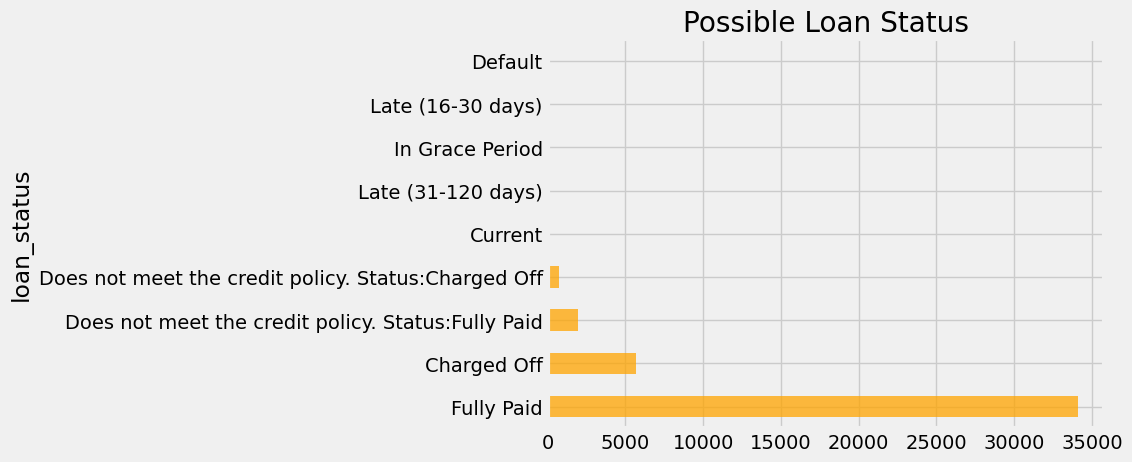

In [26]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()

In [27]:
loan_data = loan_data[(loan_data['loan_status'] == "Fully Paid") | (loan_data['loan_status'] == "Charged Off")]

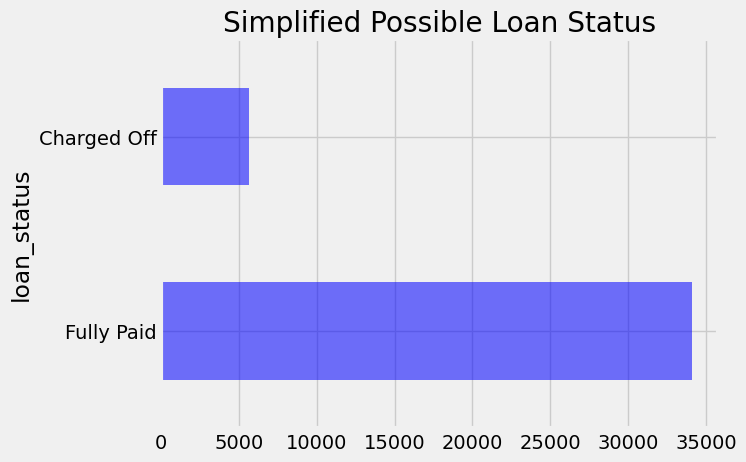

In [28]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'blue', title = 'Simplified Possible Loan Status', alpha = 0.55)
plt.show()

In [29]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
loan_data = loan_data.replace(status_replace)

<ipython-input-29-2377f6a4b312>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data = loan_data.replace(status_replace)


In [30]:
loan_data['loan_status'].value_counts()

,count
loan_status,
1,34085
0,5662


In [31]:
loan_data.shape

(39747, 34)

In [32]:
orig_columns = loan_data.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_data[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan_data = loan_data.drop(drop_columns, axis = 1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [33]:
loan_data.shape

(39747, 25)

In [34]:
null_counts = loan_data.isnull().sum()
null_counts

,0
loan_amnt,0
term,0
int_rate,0
installment,0
emp_length,1076
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0
loan_status,0


In [35]:
loan_data = loan_data.drop("pub_rec_bankruptcies", axis=1)
loan_data = loan_data.dropna(axis=0)

In [36]:
loan_data.shape

(38612, 24)

In [37]:
print(loan_data.dtypes.value_counts())

object     13
float64    10
int64       1
Name: count, dtype: int64


In [38]:
object_columns_df = loan_data.select_dtypes(include=["object"])
print(object_columns_df.shape)

(38612, 13)


In [39]:
columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state']
for col in columns:
    print(loan_data[col].value_counts())
    print(" ")

term
36 months    28234
60 months    10378
Name: count, dtype: int64
 
emp_length
10+ years    8886
< 1 year     4573
2 years      4387
3 years      4090
4 years      3429
5 years      3279
1 year       3236
6 years      2224
7 years      1770
8 years      1480
9 years      1258
Name: count, dtype: int64
 
home_ownership
RENT        18451
MORTGAGE    17226
OWN          2836
OTHER          96
NONE            3
Name: count, dtype: int64
 
verification_status
Not Verified       16466
Verified           12354
Source Verified     9792
Name: count, dtype: int64
 
addr_state
CA    6903
NY    3707
FL    2776
TX    2672
NJ    1821
IL    1486
PA    1480
VA    1377
GA    1357
MA    1312
OH    1190
MD    1033
AZ     831
WA     806
CO     768
NC     760
CT     733
MI     688
MO     661
MN     591
NV     482
SC     464
WI     444
OR     434
AL     431
LA     426
KY     323
OK     293
KS     260
UT     252
AR     235
DC     212
RI     197
NM     183
HI     169
WV     168
NH     162
DE     110
WY     

In [40]:
print (loan_data["purpose"].value_counts())
print (" ")
print (loan_data["title"].value_counts())

purpose
debt_consolidation    18239
credit_card            4999
other                  3821
home_improvement       2883
major_purchase         2108
small_business         1779
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: count, dtype: int64
 
title
Debt Consolidation         2145
Debt Consolidation Loan    1691
Personal Loan               643
Consolidation               508
debt consolidation          488
                           ... 
Kill My High % CC Debt        1
CR Card Payoff                1
Road to debt freedom          1
Patio upgrade                 1
devloan                       1
Name: count, Length: 19133, dtype: int64


In [41]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loan_data = loan_data.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loan_data["int_rate"] = loan_data["int_rate"].str.rstrip("%").astype("float")
loan_data["revol_util"] = loan_data["revol_util"].str.rstrip("%").astype("float")
loan_data = loan_data.replace(mapping_dict)

<ipython-input-41-be67a5789470>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data = loan_data.replace(mapping_dict)


In [42]:
categorical_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loan_data[categorical_columns])
loan_data = pd.concat([loan_data, dummy_df], axis=1)
loan_data = loan_data.drop(categorical_columns, axis=1)

In [43]:
loan_data.head()

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,Dec-2011,1,860xx,27.65,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,2500.0,15.27,59.83,30000.0,Dec-2011,0,309xx,1.00,0.0,5.0,...,False,False,False,False,False,False,False,False,False,True
2,2400.0,15.96,84.33,12252.0,Dec-2011,1,606xx,8.72,0.0,2.0,...,False,False,False,False,False,True,False,False,True,False
3,10000.0,13.49,339.31,49200.0,Dec-2011,1,917xx,20.00,0.0,1.0,...,False,False,False,True,False,False,False,False,True,False
5,5000.0,7.90,156.46,36000.0,Dec-2011,1,852xx,11.20,0.0,3.0,...,False,False,False,False,False,False,False,True,True,False


In [44]:
# cleaned and filtered data to csv
loan_data.to_csv('clean_loan_data.csv', index = False)

In [45]:
loan_data = pd.read_csv('clean_loan_data.csv')

In [46]:
loan_data

,loan_amnt,int_rate,installment,annual_inc,issue_d,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,24000.0,Dec-2011,1,860xx,27.65,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,2500.0,15.27,59.83,30000.0,Dec-2011,0,309xx,1.00,0.0,5.0,...,False,False,False,False,False,False,False,False,False,True
2,2400.0,15.96,84.33,12252.0,Dec-2011,1,606xx,8.72,0.0,2.0,...,False,False,False,False,False,True,False,False,True,False
3,10000.0,13.49,339.31,49200.0,Dec-2011,1,917xx,20.00,0.0,1.0,...,False,False,False,True,False,False,False,False,True,False
4,5000.0,7.90,156.46,36000.0,Dec-2011,1,852xx,11.20,0.0,3.0,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38607,2500.0,8.07,78.42,110000.0,Jul-2007,1,802xx,11.33,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
38608,8500.0,10.28,275.38,18000.0,Jul-2007,1,274xx,6.40,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
38609,5000.0,8.07,156.84,100000.0,Jul-2007,1,017xx,2.30,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
38610,5000.0,7.43,155.38,200000.0,Jul-2007,1,208xx,3.72,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [47]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38612 entries, 0 to 38611
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38612 non-null  float64
 1   int_rate                             38612 non-null  float64
 2   installment                          38612 non-null  float64
 3   annual_inc                           38612 non-null  float64
 4   issue_d                              38612 non-null  object 
 5   loan_status                          38612 non-null  int64  
 6   zip_code                             38612 non-null  object 
 7   dti                                  38612 non-null  float64
 8   delinq_2yrs                          38612 non-null  float64
 9   inq_last_6mths                       38612 non-null  float64
 10  open_acc                             38612 non-null  float64
 11  pub_rec                     

In [48]:
import numpy as np
import pandas as pd

# Initialize predictions
predictions = pd.Series(np.ones(loan_data.shape[0]))

# Filters
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)

# Counts
false_positive = len(predictions[false_positive_filter])
true_positive = len(predictions[true_positive_filter])
false_negative = len(predictions[false_negative_filter])
true_negative = len(predictions[true_negative_filter])

# Rates
true_positive_rate = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
false_positive_rate = false_positive / (false_positive + true_negative) if (false_positive + true_negative) > 0 else 0

# Output
print(true_positive_rate)
print(false_positive_rate)


1.0
1.0


In [49]:
total_predictions = true_positive + false_positive + false_negative + true_negative
accuracy = (true_positive + true_negative) / total_predictions if total_predictions > 0 else 0
print(accuracy)


0.8597586242618875


In [50]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8597586242618875

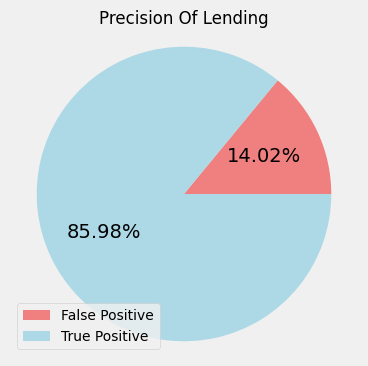

In [51]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue']
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision Of Lending', fontsize=12)
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [55]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression

# Convert date column
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], errors='coerce')
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data = loan_data.drop(columns=['issue_d'])

# One-hot encode categorical columns and define features/target
features = pd.get_dummies(loan_data.drop(columns=["loan_status"]), drop_first=True)
target = loan_data["loan_status"]

# Set up model and CV
lr = LogisticRegression(class_weight="balanced", max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Cross-validation predictions
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# Confusion matrix
false_positive = ((predictions == 1) & (target == 0)).sum()
true_positive = ((predictions == 1) & (target == 1)).sum()
false_negative = ((predictions == 0) & (target == 1)).sum()
true_negative = ((predictions == 0) & (target == 0)).sum()

# Calculate rates
true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

true_positive_rate, false_positive_rate


<ipython-input-55-b269d8f1b8ee>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase 

(np.float64(0.6316534626622887), np.float64(0.37414589104339796))

In [58]:
# Print results
print(float(true_positive_rate))
print(float(false_positive_rate))

0.6316534626622887
0.37414589104339796


In [56]:
accuracy = float(true_positive + true_negative)/float((true_positive + false_positive+ false_negative + true_negative))
accuracy

0.6308401533202114

In [57]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.9118938899760818

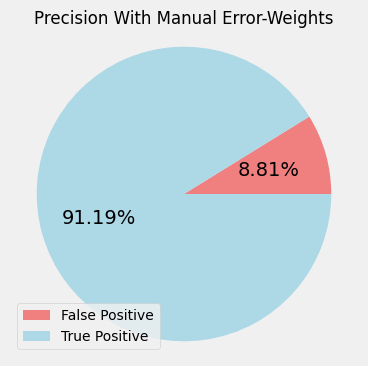

In [59]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue']
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision With Manual Error-Weights', fontsize=12)
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold

# Initialize Random Forest with class weights balanced
rf = RandomForestClassifier(class_weight="balanced", random_state=1)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions
predictions = cross_val_predict(rf, features, target, cv=kf)

# Convert predictions to pandas Series
predictions = pd.Series(predictions)

# Output predictions
predictions.head()


,0
0,1
1,1
2,1
3,1
4,1


In [61]:
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive)/float((true_positive + false_negative))
false_positive_rate = float(false_positive)/float((false_positive + true_negative))

print (float(true_positive_rate))
print (float(false_positive_rate))

0.9996083983492484
0.9977839335180055


In [62]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

0.8597327255775407

In [63]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8599787493197191

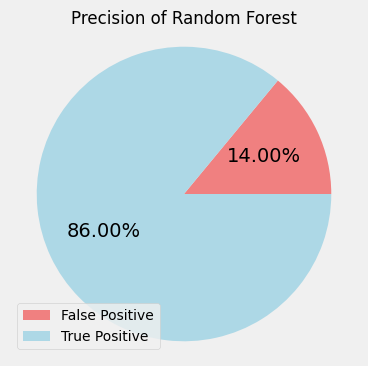

In [64]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue']
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision of Random Forest', fontsize=12)
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()